In [1]:
# Load the data
# Clean the data
# Feature Enginnering
# Preproccessing
# Modelling
# RandomSearching
# GridSearching
# Final Project Repat

In [2]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    LabelEncoder,
    Normalizer,
)
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,precision_score,f1_score,recall_score
import pickle
np.random.seed(42)

In [3]:
import wandb
PROJECT_NAME = 'House-Prices-Advanced-Regression-Techniques-V1'
def valid(model,X,y,val=False):
    y_test = y
    y_preds = model.predict(X)
    if val is True:
        results = {
#             'Val Accuracy':model.score(X,y),
            'Val MAE':mean_absolute_error(y_test,y_preds),
            'Val MSE':mean_squared_error(y_test,y_preds),
        }
    else:
        results = {
#             'Accuracy':model.score(X,y),
            'MAE':mean_absolute_error(y_test,y_preds),
            'MSE':mean_squared_error(y_test,y_preds),
        }
    return results
def fit(model,X_train,X_test,y_train,y_test,name):
    wandb.init(project=PROJECT_NAME,name=name)
    model = model
    try:
        model.fit(X_train,y_train,task='regression')
    except:
        model.fit(X_train,y_train)
    print('Logging')
    wandb.log(valid(model,X_train,y_train))
    wandb.log(valid(model,X_test,y_test,True))
    print('Saving')
    pickle.dump(model,open(f'./models/model-{name}.pkl','wb'))
    print('Making Submissions')
    make_submission(model)
    return model
def make_submission(model):
    data = pd.read_csv('./test.csv')
    for col_to_drop in cols_droped:
        data.drop(col_to_drop,axis=1,inplace=True)
    ids = data['Id']
    for col in zip(data.isna().sum(),data.columns):
        if col[0] > 0:
            try:
                data[col[1]].fillna(data[col[1]].median(),inplace=True)
            except:
                data[col[1]].fillna(random.choice(data[col[1]].tolist()),inplace=True)
    data = mct.transform(data)
    preds = model.predict(data)
    df = pd.DataFrame({'Id':ids,'SalePrice':preds})
    df.to_csv('./submisssion.csv',index=False)
    return df

In [4]:
data = pd.read_csv('./train.csv')

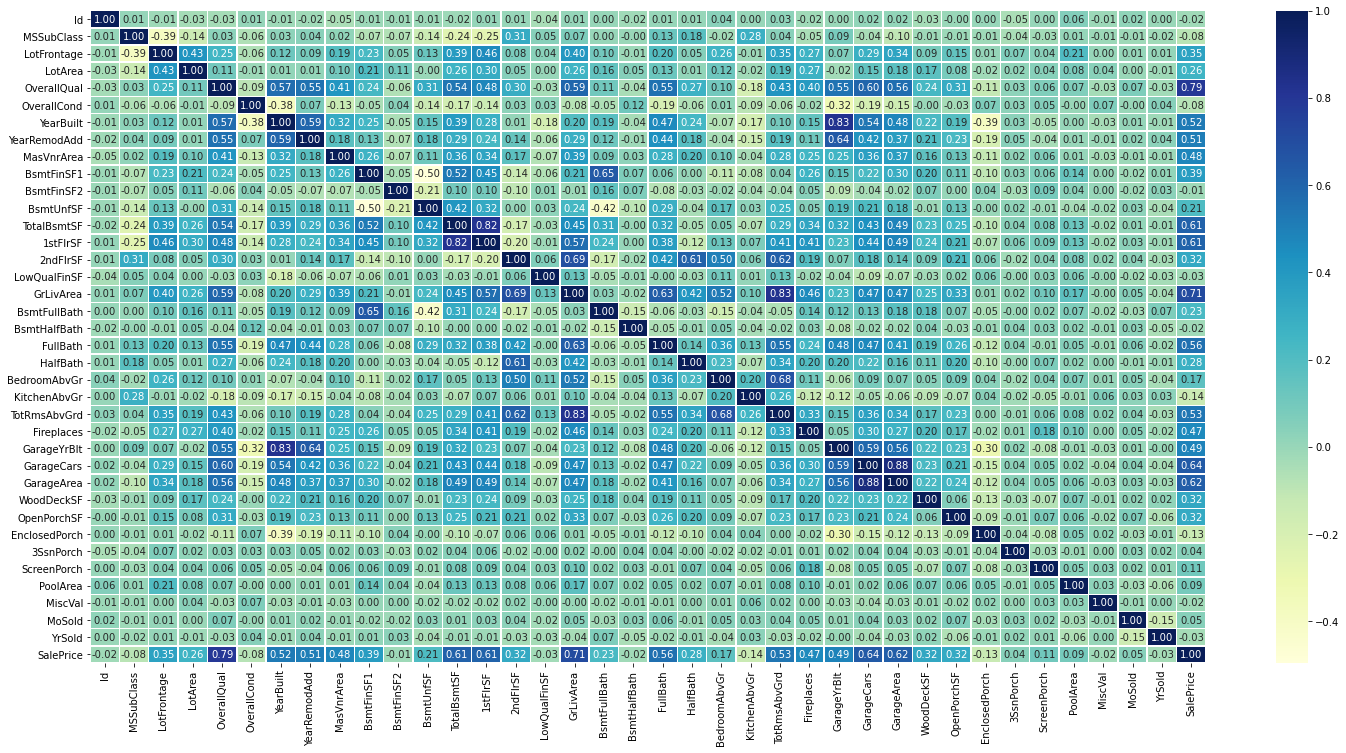

In [5]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(25,12))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

In [6]:
corr_matrix = data.corr()

In [7]:
corr_matrix.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
len(data)

1460

In [10]:
cols_droped = []
for col in zip(data.isna().sum(),data.columns):
    if col[0] > 0:
        cols_droped.append(col[1])
        data.drop(col[1],axis=1,inplace=True)

In [11]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
cols_to_one_hot_encode = []
for col in  zip(data.dtypes,data.columns):
    if col[0] == 'object':
        cols_to_one_hot_encode.append(col[1])

In [13]:
from sklearn.compose import make_column_transformer

In [14]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.0625)

In [15]:
old_data = data.copy()

In [16]:
print(list(X.columns).remove('Id'))

None


In [17]:
old_data = data.copy()

In [18]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.0625)
mct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),cols_to_one_hot_encode),
    remainder='passthrough'
)
X_train = mct.fit_transform(X_train)
X_test = mct.transform(X_test)
# X_train = X_train.toarray()
# X_test = X_test.toarray()

In [19]:
# model = fit(GradientBoostingRegressor(),X_train,X_test,y_train,y_test,'baseline')

In [20]:
pre_cols = list(data.drop(cols_to_one_hot_encode,axis=1).columns)

In [21]:
# models = [
#     ['KNeighborsRegressor',KNeighborsRegressor],
#     ['LogisticRegression',LogisticRegression],
#     ['LogisticRegressionCV',LogisticRegressionCV],
#     ['DecisionTreeRegressor',DecisionTreeRegressor],
#     ['GradientBoostingRegressor',GradientBoostingRegressor],
#     ['AdaBoostRegressor',AdaBoostRegressor],
#     ['RandomForestRegressor',RandomForestRegressor],
#     ['BaggingRegressor',BaggingRegressor],
#     ['SVR',SVR],
# ]

In [22]:
# for model in models:
#     model = fit(model[1](),X_train,X_test,y_train,y_test,model[0])

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# model = GradientBoostingRegressor()
# for _ in range(10):
#     model = fit(model,X_train,X_test,y_train,y_test,'baseline')

In [25]:
# model.best_params_

In [26]:
from flaml import AutoML

In [32]:
# model = AutoML()
# model = fit(model,X_train,X_test,y_train,y_test,'final')

In [40]:
# !pip3 install transformers

In [30]:
from transformers import AutoTokenizer

In [42]:
from transformers import AutoModel

In [43]:
model = AutoModel.from_pretrained("adalbertojunior/bert_regression")

Some weights of the model checkpoint at adalbertojunior/bert_regression were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [44]:
fit(model,X_train,X_test,y_train,y_test,'final')

ModuleAttributeError: 'BertModel' object has no attribute 'fit'